In [1]:
import modin.pandas as mpd
#df = mpd.read_csv(r"2022_Yellow_Taxi_Trip_Data_20250414.csv")


In [ ]:
# Convert the DataFrame to Parquet format with gzip compression
#df.to_parquet("2022_Yellow_Taxi_Trip_Data_20250414.parquet", compression="gzip")



In [2]:
df= mpd.read_parquet("2022_Yellow_Taxi_Trip_Data_20250414.parquet")


2025-04-28 15:19:42,534	INFO worker.py:1852 -- Started a local Ray instance.


(_remote_exec_multi_chain pid=29616) UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
(_remote_exec_multi_chain pid=19976) UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
(_remote_exec_multi_chain pid=12456) UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format. [repeated 6x across cluster]
(_remote_exec_multi_chain pid=32216) UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
(_remote_exec_multi_chain pid=10044) UserWarning: Could not infer format, so each eleme

In [4]:
print(df.head())


   VendorID    tpep_pickup_datetime   tpep_dropoff_datetime  passenger_count  \
0         1  01/01/2022 12:35:40 AM  01/01/2022 12:53:29 AM                2   
1         1  01/01/2022 12:33:43 AM  01/01/2022 12:42:07 AM                1   
2         2  01/01/2022 12:53:21 AM  01/01/2022 01:02:19 AM                1   
3         2  01/01/2022 12:25:21 AM  01/01/2022 12:35:23 AM                1   
4         2  01/01/2022 12:36:48 AM  01/01/2022 01:14:20 AM                1   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.80           1                  N           142           236   
1           2.10           1                  N           236            42   
2           0.97           1                  N           166           166   
3           1.09           1                  N           114            68   
4           4.30           1                  N            68           163   

   payment_type  fare_amount  extra  mta_tax

In [5]:
print(df.dtypes)

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
airport_fee              float64
dtype: object


In [6]:
# check how many values are missing in each column
print(df.isnull().sum())

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count          1368303
trip_distance                  0
RatecodeID               1368303
store_and_fwd_flag       1368303
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge     1368303
airport_fee              1368303
dtype: int64


In [7]:
# check percentage of missing values in each column
print(df.isnull().sum() / len(df) * 100)

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.450423
trip_distance            0.000000
RatecodeID               3.450423
store_and_fwd_flag       3.450423
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.450423
airport_fee              3.450423
dtype: float64


In [3]:
# convert the pickup and dropoff datetime columns to datetime objects
df['tpep_pickup_datetime'] = mpd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = mpd.to_datetime(df['tpep_dropoff_datetime'])
#df.dtypes

In [4]:
df_cleaned = df.copy()

In [7]:
df_cleaned = df_cleaned.drop(columns=['improvement_surcharge', 'store_and_fwd_flag'])

In [8]:
# how many rows are there in the sampled dataframe
print(len(df_cleaned))

39656098


In [5]:
missing_cols = ['passenger_count', 'RatecodeID', 'congestion_surcharge', 'airport_fee']
# Create a boolean mask for rows where ALL 4 columns are NaN
all_missing_mask = df_cleaned[missing_cols].isnull().all(axis=1)

In [9]:
missing_cols = ['passenger_count', 'RatecodeID', 'congestion_surcharge', 'airport_fee']

# Create a boolean mask for rows where ALL 4 columns are NaN
all_missing_mask = df_cleaned[missing_cols].isnull().all(axis=1)

# Count how many rows this applies to
num_all_missing = all_missing_mask.sum()

print(f"Rows with all 4 values missing: {num_all_missing}")

Rows with all 4 values missing: 1368303


In [6]:
# Remove rows where ALL 4 columns are NaN
df_cleaned = df_cleaned[~all_missing_mask]


In [26]:
# print the names of the columns
print(len(df_cleaned.columns))

19


In [14]:
# get database statistics
df_cleaned.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,congestion_surcharge,airport_fee
count,3.828780e+07,38287795,38287795,3.828780e+07,3.828780e+07,3.828780e+07,3.828780e+07,3.828780e+07,3.828780e+07,3.828780e+07,3.828780e+07,3.828780e+07,3.828780e+07,3.828780e+07,3.828780e+07,3.828780e+07,3.828780e+07
mean,1.713156e+00,2022-07-05 00:02:30.606806528,2022-07-05 00:57:11.752203264,1.401149e+00,3.514399e+00,1.424172e+00,1.649293e+02,1.628563e+02,1.232061e+00,1.462763e+01,1.040985e+00,4.885367e-01,2.713900e+00,5.310589e-01,2.142373e+01,2.281437e+00,9.741937e-02
min,1.000000e+00,2001-01-01 00:03:14,2001-01-01 00:34:17,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-2.564000e+03,-2.218000e+01,-5.500000e-01,-4.100000e+02,-9.999000e+01,-2.567800e+03,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,2022-04-07 19:04:36.500000,2022-04-07 19:21:25,1.000000e+00,1.100000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,7.000000e+00,0.000000e+00,5.000000e-01,7.000000e-01,0.000000e+00,1.230000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2022-06-30 23:33:04,2022-06-30 23:50:20,1.000000e+00,1.860000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.000000e+01,5.000000e-01,5.000000e-01,2.150000e+00,0.000000e+00,1.595000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2022-10-04 17:04:52.500000,2022-10-04 17:23:22,1.000000e+00,3.490000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,1.600000e+01,2.500000e+00,5.000000e-01,3.350000e+00,0.000000e+00,2.277000e+01,2.500000e+00,0.000000e+00
max,2.000000e+00,2023-04-18 14:30:05,2023-04-18 23:30:39,9.000000e+00,1.843408e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,4.010923e+05,3.350000e+01,2.548000e+01,1.400160e+03,9.118700e+02,4.010956e+05,2.750000e+00,1.250000e+00
std,4.522879e-01,NaN,NaN,9.628938e-01,5.643246e+01,5.794343e+00,6.494462e+01,7.015708e+01,4.760829e-01,9.743135e+01,1.271069e+00,9.508469e-02,3.288837e+00,2.031171e+00,9.801355e+01,7.519435e-01,3.385391e-01


In [15]:
# print rows where trip distance is greater than 100 miles
# and sort them in descending order, and decending by total_amount
df_cleaned[df_cleaned["trip_distance"] > 100].sort_values("trip_distance", ascending=False).head(10)



,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,congestion_surcharge,airport_fee
18946468,2,2022-06-24 08:24:35,2022-06-24 08:32:20,1.0,184340.80,5.0,113,107,2,38.08,0.0,0.5,0.00,0.00,41.38,2.5,0.0
26162251,2,2022-09-01 09:04:30,2022-09-01 09:15:17,1.0,164072.79,5.0,262,238,1,16.00,0.0,0.5,3.24,0.00,22.54,2.5,0.0
25049328,2,2022-08-21 19:12:22,2022-08-21 19:21:02,1.0,115324.12,5.0,75,141,1,8.81,0.0,0.5,0.93,0.00,13.04,2.5,0.0
17780340,2,2022-06-14 07:35:51,2022-06-14 08:15:36,1.0,108786.09,5.0,14,163,1,39.70,0.0,0.5,10.80,6.55,60.35,2.5,0.0
35537780,2,2022-11-25 05:58:45,2022-11-25 05:59:59,1.0,103319.46,5.0,166,166,3,8.08,0.0,0.5,0.68,0.00,9.56,0.0,0.0
35537779,2,2022-11-25 05:58:45,2022-11-25 05:59:59,1.0,103319.46,5.0,166,166,3,-8.38,0.0,-0.5,-0.68,0.00,-9.56,0.0,0.0
8054108,2,2022-03-24 13:56:56,2022-03-24 13:58:14,1.0,53440.55,5.0,193,193,1,26.55,0.0,0.5,5.47,0.00,34.77,0.0,0.0
36940341,2,2022-12-06 19:03:31,2022-12-06 19:15:46,1.0,43918.95,4.0,186,170,4,-42.09,0.0,0.0,0.00,0.00,-44.59,-2.5,0.0
36940342,2,2022-12-06 19:03:31,2022-12-06 19:15:46,1.0,43918.95,4.0,186,170,4,42.09,0.0,0.0,0.00,0.00,44.59,2.5,0.0
9501280,2,2022-05-05 06:03:36,2022-05-05 06:14:37,1.0,29445.65,5.0,263,107,1,12.06,0.0,0.5,1.18,0.00,16.54,2.5,0.0


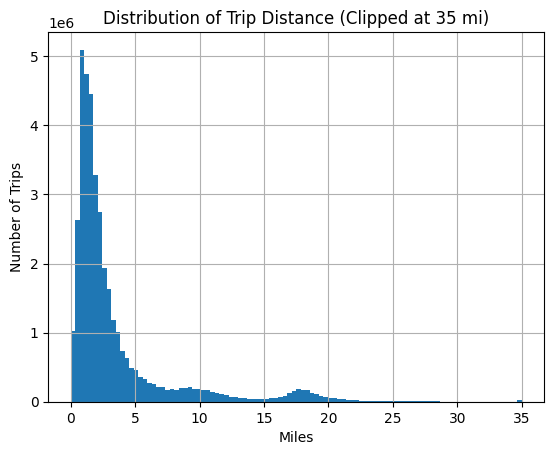

In [14]:
import matplotlib.pyplot as plt

df_cleaned["trip_distance"].clip(upper=35).hist(bins=100)  # clipping at 35 miles for readability
plt.title("Distribution of Trip Distance (Clipped at 35 mi)")
plt.xlabel("Miles")
plt.ylabel("Number of Trips")
plt.show()


<Axes: >

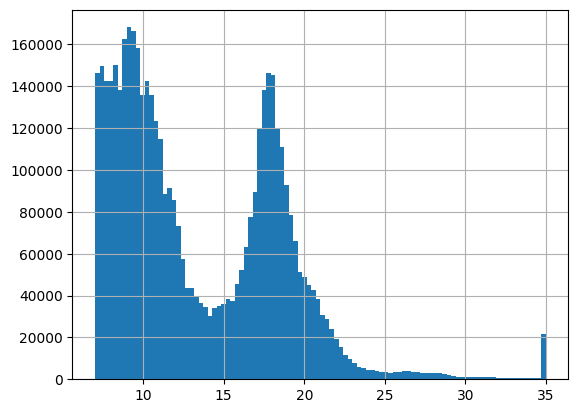

In [15]:
#  make a copy of the dataframe but only keep rows where the trip distance is greater than 7

df_cleaned_1 = df_cleaned[df_cleaned["trip_distance"] > 7].copy()
# make a histogram of the trip distance
df_cleaned_1["trip_distance"].clip(upper=35).hist(bins=100)


In [17]:
# check how many entries are from different years in 'tpep_pickup_datetime' column
print(df_cleaned['tpep_pickup_datetime'].dt.year.value_counts())

the groupby keys will be sorted anyway, although the 'sort=False' was passed. See the following issue for more details: https://github.com/modin-project/modin/issues/3571.


tpep_pickup_datetime
2022    38287234
2002         441
2009          40
2008          34
2021          24
2003           9
2001           6
2023           6
2012           1
Name: count, dtype: int64


In [7]:
# only keep the rows from 2022
df_cleaned = df_cleaned[df_cleaned['tpep_pickup_datetime'].dt.year == 2022]

In [9]:
# make a copy of the dataframe but limit trip distance to 40 miles
df_cleaned_30 = df_cleaned.copy()
# remove rows where trip distance is greater than 35 miles
df_cleaned_30 = df_cleaned_30[df_cleaned_30["trip_distance"] <= 40]

In [10]:
#  create a new column that calculates time difference between pickup and dropoff datetime, resulting in a timedelta object
df_cleaned_30['trip_duration'] = df_cleaned_30['tpep_dropoff_datetime'] - df_cleaned_30['tpep_pickup_datetime']
# convert the timedelta object to minutes
df_cleaned_30['trip_duration'] = df_cleaned_30['trip_duration'].dt.total_seconds() / 60.0
# make new column 'average_speed' that calculates average speed in miles per hour
df_cleaned_30['average_speed'] = df_cleaned_30['trip_distance'] / (df_cleaned_30['trip_duration'] / 60.0)

In [ ]:
# remove rows where total amount is less than 2
#df_cleaned_35 = df_cleaned_35[df_cleaned_35['total_amount'] >= 2]

In [ ]:
# Cutoff for total_amount (fare)
print("Fare 95th percentile:", df_cleaned_30['total_amount'].quantile(0.95))
print("Fare 99th percentile:", df_cleaned_30['total_amount'].quantile(0.99))

# Cutoff for trip_duration (minutes)
print("Duration 95th percentile:", df_cleaned_30['trip_duration'].quantile(0.95))
print("Duration 99th percentile:", df_cleaned_30['trip_duration'].quantile(0.99))

Fare 95th percentile: 63.1
Fare 99th percentile: 81.1
Duration 95th percentile: 40.8
Duration 99th percentile: 65.9


In [11]:
# only keep rows where trip duration is more than 1 and less than 70 minutes
df_cleaned_30 = df_cleaned_30[(df_cleaned_30['trip_duration'] > 1) & (df_cleaned_30['trip_duration'] < 70)]
# only keep rows where total amount is less than 150 and greater than 3
df_cleaned_30 = df_cleaned_30[(df_cleaned_30['total_amount'] > 3) & (df_cleaned_30['total_amount'] < 115)]

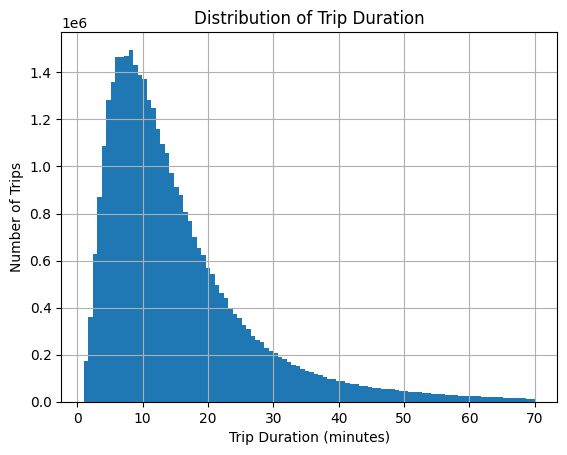

In [20]:
import matplotlib.pyplot as plt

df_cleaned_30["trip_duration"].hist(bins=100)  
plt.title("Distribution of Trip Duration")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Number of Trips")
plt.show()

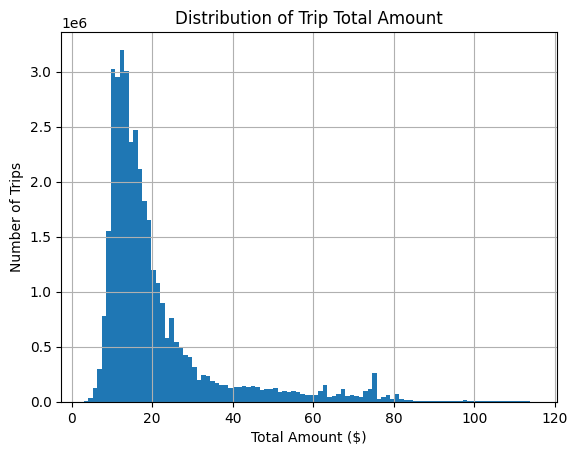

In [23]:
import matplotlib.pyplot as plt

df_cleaned_30["total_amount"].hist(bins=100)  
plt.title("Distribution of Trip Total Amount")
plt.xlabel("Total Amount ($)")
plt.ylabel("Number of Trips")
plt.show()

In [ ]:
# Remove outliers based on the 99th percentile for total_amount and trip_duration
# df_cleaned_35 = df_cleaned_35[
#     (df_cleaned_35['total_amount'] <= df_cleaned_35['total_amount'].quantile(0.99)) &
#     (df_cleaned_35['trip_duration'] <= df_cleaned_35['trip_duration'].quantile(0.99))
# ]

In [ ]:
# what is the percentage of data in df_cleaned_35 compared to df_cleaned?
percentage = (len(df_cleaned_30) / len(df_cleaned)) * 100
print(f"Percentage of data in df_cleaned_35 compared to df_cleaned: {percentage:.2f}%")

Percentage of data in df_cleaned_35 compared to df_cleaned: 97.41%


In [ ]:
df_cleaned_30[df_cleaned_30["trip_distance"] > 0] \
    .sort_values(by=["trip_distance", "total_amount"], ascending=[False, False]) \
    .head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,congestion_surcharge,airport_fee
11972490,1,2022-05-26 13:47:08,2022-05-26 15:12:29,1.0,35.0,5.0,48,265,1,253.0,0.00,0.0,50.65,0.00,303.95,0.0,0.00
18471380,2,2022-06-20 01:10:12,2022-06-20 01:58:56,2.0,35.0,5.0,132,265,1,189.0,0.00,0.0,39.17,6.55,236.27,0.0,1.25
36024366,2,2022-11-30 01:08:22,2022-11-30 01:54:41,1.0,35.0,5.0,100,265,1,175.0,0.00,0.0,46.09,6.55,230.44,2.5,0.00
10048916,1,2022-05-09 21:30:05,2022-05-09 22:14:23,1.0,35.0,5.0,132,265,1,220.0,1.25,0.0,0.00,6.55,228.10,0.0,1.25
18546573,1,2022-06-20 19:59:43,2022-06-20 20:46:28,4.0,35.0,5.0,132,265,1,195.0,1.25,0.0,10.00,6.55,213.10,0.0,1.25
19129268,1,2022-06-25 18:04:44,2022-06-25 19:21:53,0.0,35.0,5.0,10,1,1,180.0,0.00,0.0,0.00,20.30,200.60,0.0,0.00
33341325,1,2022-11-03 20:49:17,2022-11-03 21:33:23,1.0,35.0,4.0,132,265,1,164.0,1.75,0.5,33.30,0.00,199.85,0.0,1.25
17434840,1,2022-06-10 22:02:08,2022-06-10 23:01:01,1.0,35.0,4.0,162,265,1,145.0,3.00,0.5,45.45,2.75,197.00,2.5,0.00
1129748,1,2022-01-16 09:16:02,2022-01-16 09:59:05,1.0,35.0,5.0,132,265,2,175.0,1.25,0.0,0.00,18.30,194.85,0.0,1.25
10135882,1,2022-05-10 18:24:17,2022-05-10 19:31:52,2.0,35.0,5.0,132,265,1,162.5,1.25,0.0,10.00,20.30,194.35,0.0,1.25


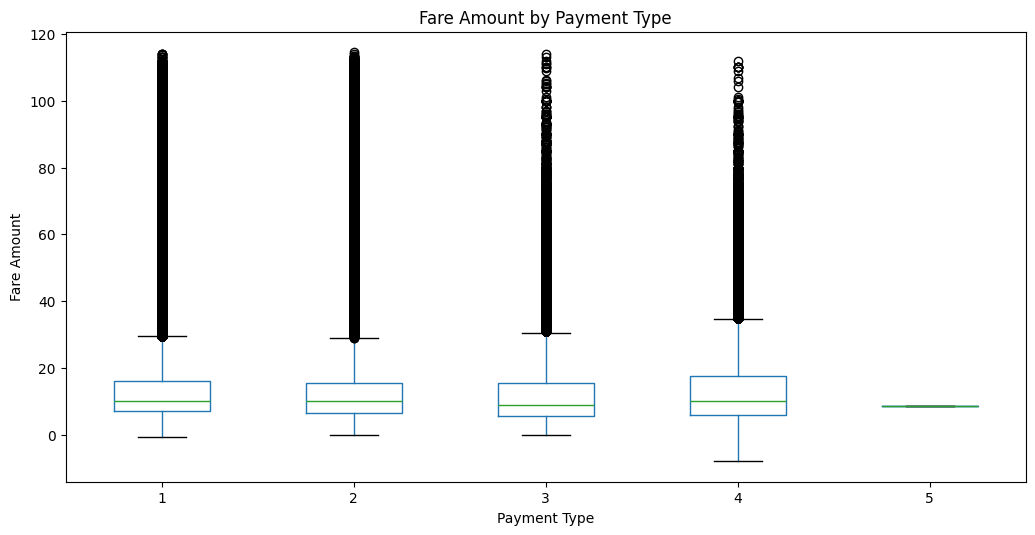

In [25]:
# create box and whisker plot for the fare amount
df_cleaned_30.boxplot(column='fare_amount', by='payment_type', figsize=(12, 6), grid=False)
plt.suptitle('')
plt.title('Fare Amount by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Fare Amount')
plt.show()

In [12]:
# import taxi_zone_lookup.csv file
zone_lookup = mpd.read_csv(r"taxi_zone_lookup.csv")
# check the first 5 rows of the dataframe
print(zone_lookup.head())

   LocationID        Borough                     Zone service_zone
0           1            EWR           Newark Airport          EWR
1           2         Queens              Jamaica Bay    Boro Zone
2           3          Bronx  Allerton/Pelham Gardens    Boro Zone
3           4      Manhattan            Alphabet City  Yellow Zone
4           5  Staten Island            Arden Heights    Boro Zone


In [13]:
# Merging
# Rename Zone column so it's clear after merge
zone_lookup_pickup = zone_lookup.rename(columns={
    "LocationID": "PULocationID",
    "Zone": "pickup_zone"
})

zone_lookup_dropoff = zone_lookup.rename(columns={
    "LocationID": "DOLocationID",
    "Zone": "dropoff_zone"
})

# Merge pickup zone
df_cleaned_30 = df_cleaned_30.merge(zone_lookup_pickup[["PULocationID", "pickup_zone"]],
                                    on="PULocationID", how="left")

# Merge dropoff zone
df_cleaned_30 = df_cleaned_30.merge(zone_lookup_dropoff[["DOLocationID", "dropoff_zone"]],
                                    on="DOLocationID", how="left")

In [28]:
df_cleaned_30.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration,average_speed,pickup_zone,dropoff_zone
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2,3.80,1,N,142,236,1,...,3.65,0.00,0.3,21.95,2.5,0.0,17.816667,12.797007,Lincoln Square East,Upper East Side North
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1,2.10,1,N,236,42,1,...,4.00,0.00,0.3,13.30,0.0,0.0,8.400000,15.000000,Upper East Side North,Central Harlem North
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1,0.97,1,N,166,166,1,...,1.76,0.00,0.3,10.56,0.0,0.0,8.966667,6.490706,Morningside Heights,Morningside Heights
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1,1.09,1,N,114,68,2,...,0.00,0.00,0.3,11.80,2.5,0.0,10.033333,6.518272,Greenwich Village South,East Chelsea
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1,4.30,1,N,68,163,1,...,3.00,0.00,0.3,30.30,2.5,0.0,37.533333,6.873890,East Chelsea,Midtown North
5,1,2022-01-01 00:40:15,2022-01-01 01:09:48,1,10.30,1,N,138,161,1,...,13.00,6.55,0.3,56.35,2.5,0.0,29.550000,20.913706,LaGuardia Airport,Midtown Center
6,2,2022-01-01 00:20:50,2022-01-01 00:34:58,1,5.07,1,N,233,87,1,...,5.20,0.00,0.3,26.00,2.5,0.0,14.133333,21.523585,UN/Turtle Bay South,Financial District North
7,2,2022-01-01 00:13:04,2022-01-01 00:22:45,1,2.02,1,N,238,152,2,...,0.00,0.00,0.3,12.80,2.5,0.0,9.683333,12.516351,Upper West Side North,Manhattanville
8,2,2022-01-01 00:30:02,2022-01-01 00:44:49,1,2.71,1,N,166,236,1,...,2.25,0.00,0.3,18.05,2.5,0.0,14.783333,10.998873,Morningside Heights,Upper East Side North
9,2,2022-01-01 00:48:52,2022-01-01 00:53:28,1,0.78,1,N,236,141,2,...,0.00,0.00,0.3,8.80,2.5,0.0,4.600000,10.173913,Upper East Side North,Lenox Hill West


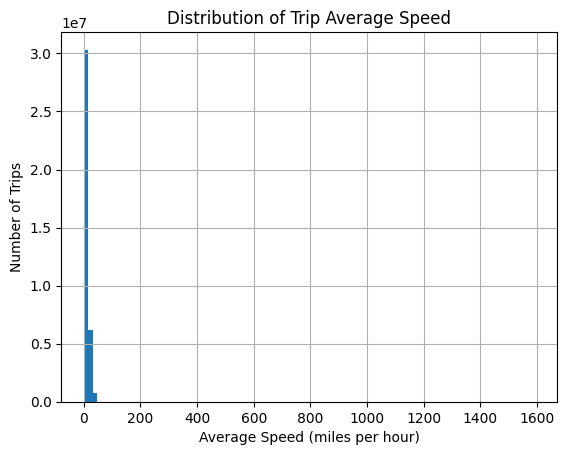

In [29]:
import matplotlib.pyplot as plt

df_cleaned_30["average_speed"].hist(bins=100)  
plt.title("Distribution of Trip Average Speed")
plt.xlabel("Average Speed (miles per hour)")
plt.ylabel("Number of Trips")
plt.show()

In [ ]:
# check how many rows in percent of all data has average speed greater than 60 miles per hour
print("Percentage of rows with average speed greater than 60 mph:", 
      (len(df_cleaned_30[df_cleaned_30["average_speed"] > 60]) / len(df_cleaned_30)) * 100)

Percentage of rows with average speed greater than 60 mph: 0.011086462571015506


In [ ]:
# print number of rows where average speed is greater than 60 mph
print(len(df_cleaned_30[df_cleaned_30["average_speed"] > 60]))

28574


In [14]:
# sort the dataframe by average speed in descending order
#df_cleaned_35[df_cleaned_35["average_speed"] > 70].sort_values("average_speed", ascending=False).head(10)
# as we can see there is an issue with some pickup and dropoff times
# we will drop the rows where average speed is greater than 60 mph
df_cleaned_35 = df_cleaned_30[df_cleaned_30["average_speed"] <= 60]

In [ ]:
df_cleaned_30.sort_values("average_speed", ascending=False).head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,mta_tax,tip_amount,tolls_amount,total_amount,congestion_surcharge,airport_fee,trip_duration,average_speed,pickup_zone,dropoff_zone
12923442,1,2022-04-06 22:46:51,2022-04-06 22:47:00,3.0,0.2,5.0,234,234,1,20.0,...,0.0,2.00,0.0,22.30,0.0,0.00,0.15,80.0,Union Sq,Union Sq
83035,1,2022-01-02 13:44:00,2022-01-02 13:44:18,1.0,0.4,3.0,132,132,1,20.0,...,0.0,38.45,0.0,60.00,0.0,1.25,0.30,80.0,JFK Airport,JFK Airport
2240412,1,2022-01-29 23:42:25,2022-01-29 23:43:10,0.0,1.0,1.0,48,48,3,2.5,...,0.5,0.00,0.0,6.30,2.5,0.00,0.75,80.0,Clinton East,Clinton East
28168522,1,2022-09-29 18:02:14,2022-09-29 18:02:23,1.0,0.2,1.0,140,140,3,2.5,...,0.5,0.00,0.0,6.80,2.5,0.00,0.15,80.0,Lenox Hill East,Lenox Hill East
13690928,1,2022-04-13 15:21:51,2022-04-13 15:22:09,0.0,0.4,1.0,161,161,2,2.5,...,0.5,0.00,0.0,5.80,2.5,0.00,0.30,80.0,Midtown Center,Midtown Center
18647306,1,2022-06-26 12:32:33,2022-06-26 12:32:42,0.0,0.2,5.0,264,264,1,50.0,...,0.0,0.00,0.0,50.30,0.0,0.00,0.15,80.0,NaN,NaN
27049942,1,2022-09-19 10:43:30,2022-09-19 10:44:06,1.0,0.8,1.0,161,161,2,2.5,...,0.5,0.00,0.0,5.80,2.5,0.00,0.60,80.0,Midtown Center,Midtown Center
11242524,1,2022-05-22 14:48:46,2022-05-22 14:48:55,3.0,0.2,5.0,132,132,1,100.0,...,0.0,0.00,0.0,101.55,0.0,1.25,0.15,80.0,JFK Airport,JFK Airport
6236768,1,2022-03-09 17:48:29,2022-03-09 17:48:47,1.0,0.4,3.0,42,42,4,20.0,...,0.0,0.00,0.0,21.30,0.0,0.00,0.30,80.0,Central Harlem North,Central Harlem North
37043754,1,2022-12-18 05:15:37,2022-12-18 05:15:55,1.0,0.4,1.0,50,50,3,2.5,...,0.5,0.00,0.0,6.30,2.5,0.00,0.30,80.0,Clinton West,Clinton West


In [ ]:
# how much percentage wise of data left compared to the original dataframe
percentage = (len(df_cleaned_30) / len(df)) * 100
print(f"Percentage of data in df_cleaned_35 compared to df_cleaned: {percentage:.2f}%")

Percentage of data in df_cleaned_35 compared to df_cleaned: 95.67%


In [15]:
# if pickup and dropoff zones  are equal to 'NaN' replace with 'Outside NYC'
df_cleaned_30['pickup_zone'] = df_cleaned_30['pickup_zone'].fillna('Outside NYC')
df_cleaned_30['dropoff_zone'] = df_cleaned_30['dropoff_zone'].fillna('Outside NYC')


In [54]:
print(len(df_cleaned_30['pickup_zone'].unique()))
print(len(df_cleaned_30['dropoff_zone'].unique()))

259
259


In [16]:
# Remove rows where either pickup or dropoff is Outside NYC or Outside of NYC
df_cleaned_30 = df_cleaned_30[
    ~(df_cleaned_30['pickup_zone'].isin(['Outside NYC', 'Outside of NYC']) |
      df_cleaned_30['dropoff_zone'].isin(['Outside NYC', 'Outside of NYC']))
]

In [48]:
# how many different combinations of pickup and dropoff zones are there?
print(len(df_cleaned_35[['pickup_zone', 'dropoff_zone']].drop_duplicates()))

42280


In [17]:
# Extract hour of day and day of week from pickup timestamp
df_cleaned_30["hour_of_day"] = df_cleaned_30["tpep_pickup_datetime"].dt.hour
df_cleaned_30["day_of_week"] = df_cleaned_30["tpep_pickup_datetime"].dt.dayofweek  # Monday = 0

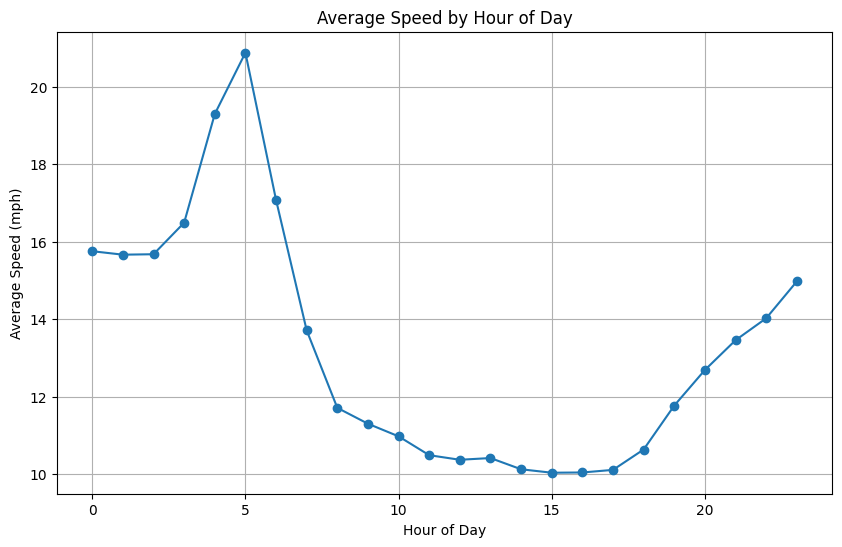

In [36]:
hourly_speed = df_cleaned_30.groupby('hour_of_day')['average_speed'].mean().reset_index()
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(hourly_speed['hour_of_day'], hourly_speed['average_speed'], marker='o')
plt.title('Average Speed by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Speed (mph)')
plt.grid(True)
plt.show()


In [65]:
# print all column names
print(df.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')


In [18]:
def is_rush_hour(hour):
    return int(7 <= hour <= 19)


df_cleaned_30["is_rush_hour"] = df_cleaned_30['hour_of_day'].apply(is_rush_hour)


In [38]:
percentage = (len(df_cleaned_30) / len(df)) * 100
print(f"Percentage of data in df_cleaned_35 compared to df_cleaned: {percentage:.2f}%")

Percentage of data in df_cleaned_35 compared to df_cleaned: 92.46%


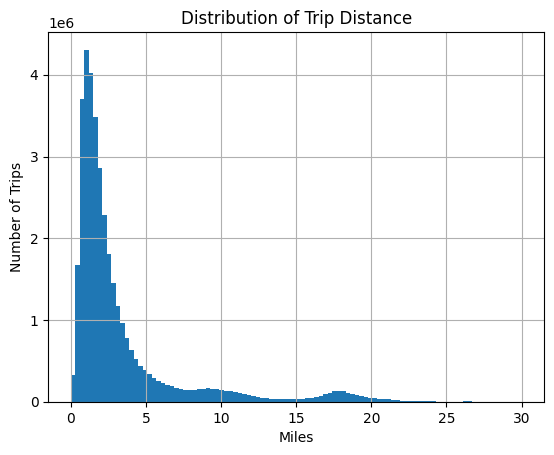

In [39]:
import matplotlib.pyplot as plt

df_cleaned_30["trip_distance"].hist(bins=100) 
plt.title("Distribution of Trip Distance")
plt.xlabel("Miles")
plt.ylabel("Number of Trips")
plt.show()

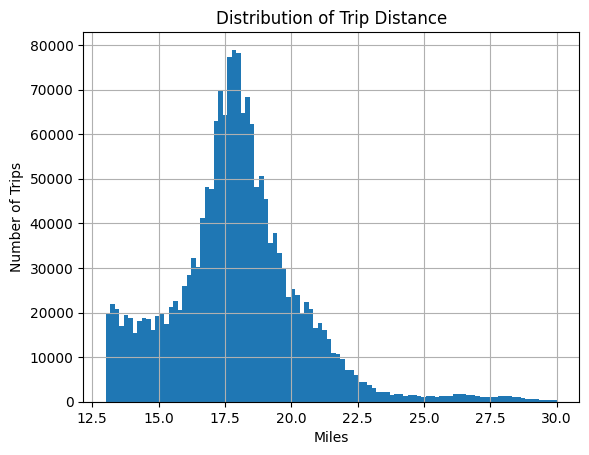

In [42]:
#  make a copy of the dataframe but only keep rows where the trip distance is greater than 7

df_cleaned_2 = df_cleaned_30[df_cleaned_30["trip_distance"] > 13].copy()
# make a histogram of the trip distance
df_cleaned_2["trip_distance"].hist(bins=100)
plt.title("Distribution of Trip Distance")
plt.xlabel("Miles")
plt.ylabel("Number of Trips")
plt.show()

In [40]:
# save dataframe into parquet
df_cleaned_30.to_parquet("cleaned2.parquet", compression="gzip")

In [19]:
# load cleaned2.parquet
df_cleaned_30 = mpd.read_parquet("cleaned2.parquet")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.731099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1102
[LightGBM] [Info] Number of data points in the train set: 29331556, number of used features: 18
[LightGBM] [Info] Start training from score 3.331029
=== Feature Importances ===
DOLocationID             867
tip_amount               621
average_speed            404
PULocationID             332
RatecodeID               205
tolls_amount             144
congestion_surcharge     107
hour_of_day               85
airport_fee               84
day_of_week               40
improvement_surcharge     37
is_rush_hour              24
extra                     17
payment_type              14
mta_tax                    8
passenger_count            6
VendorID                   5
store_and_fwd_flag         0
dtype: int32


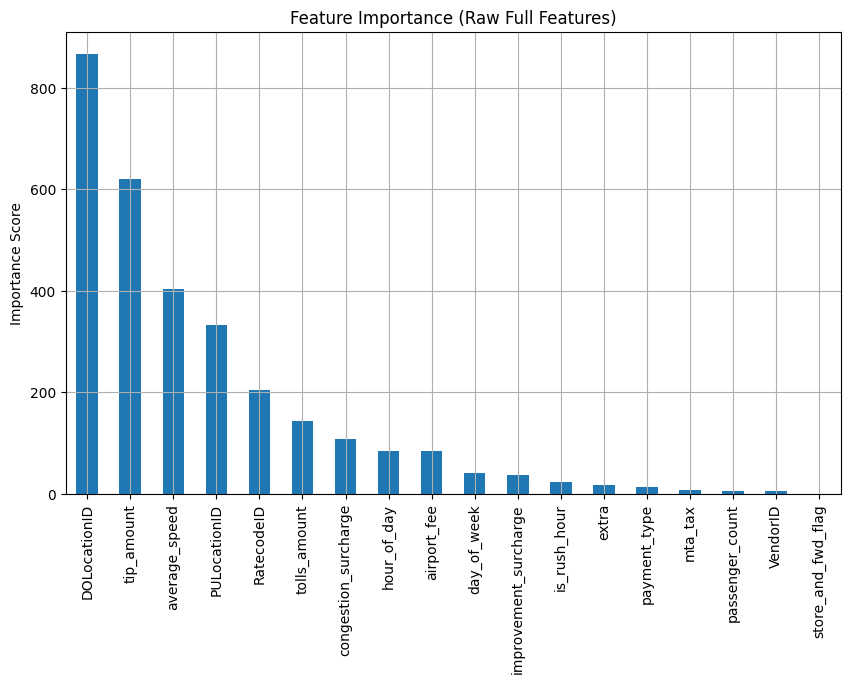

In [53]:
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# === Start from the raw, original columns ===
# (assuming you already loaded your full taxi dataset as df_raw)

# List of original columns you mentioned:
full_features = [
    'VendorID', 
    'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
    'PULocationID', 'DOLocationID', 'payment_type', 'extra',
    'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
    'congestion_surcharge', 'airport_fee',
    # --- Engineered Features ---
    'hour_of_day', 'day_of_week', 'is_rush_hour', 'average_speed'
]
df_full = df_cleaned_30[full_features].copy()
categorical_features = ['VendorID', 'PULocationID', 'DOLocationID', 'payment_type', 'hour_of_day', 'day_of_week', 'is_rush_hour', "RatecodeID", "store_and_fwd_flag"]
# --- Encode categorical columns ---
le_vendor = LabelEncoder()
le_pu = LabelEncoder()
le_do = LabelEncoder()
le_payment = LabelEncoder()
le_ratecode = LabelEncoder()
le_hour = LabelEncoder()
le_day = LabelEncoder()
le_rush = LabelEncoder()
le_flag = LabelEncoder()

df_full['VendorID'] = le_vendor.fit_transform(df_full['VendorID'].astype(int))
df_full['PULocationID'] = le_pu.fit_transform(df_full['PULocationID'].astype(int))
df_full['DOLocationID'] = le_do.fit_transform(df_full['DOLocationID'].astype(int))
df_full['payment_type'] = le_payment.fit_transform(df_full['payment_type'].astype(int))
df_full['RatecodeID'] = le_ratecode.fit_transform(df_full['RatecodeID'].astype(int))
df_full['hour_of_day'] = le_hour.fit_transform(df_full['hour_of_day'].astype(int))
df_full['day_of_week'] = le_day.fit_transform(df_full['day_of_week'].astype(int))
df_full['is_rush_hour'] = le_rush.fit_transform(df_full['is_rush_hour'].astype(int))
df_full['store_and_fwd_flag'] = le_flag.fit_transform(df_full['store_and_fwd_flag'].astype(str))

# --- Create a dummy target temporarily (example: trip_distance) ---
# We are just training a model to measure feature importance, not to deploy
X = df_full.drop(columns=['trip_distance'])  # drop your target
y = df_full['trip_distance']  # temporary target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train._to_pandas()
X_test = X_test._to_pandas()
y_train = y_train._to_pandas()
y_test = y_test._to_pandas()

# --- Train LightGBM Model ---
model = lgb.LGBMRegressor(
    n_estimators=100,
    max_depth=10,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

# --- Feature Importance ---
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Print and Plot
print("=== Feature Importances ===")
print(feature_importances)

plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importance (Raw Full Features)')
plt.ylabel('Importance Score')
plt.grid(True)
plt.show()

In [20]:
# Make a copy to preserve original
df_model_ready = df_cleaned_30.copy()

# Drop all unnecessary columns
df_model_ready = df_model_ready[[
    "pickup_zone", "dropoff_zone",
    "hour_of_day", "day_of_week",
    "passenger_count", "trip_distance",
    "RatecodeID", "congestion_surcharge",
    "average_speed", "is_rush_hour",
    "trip_duration", "total_amount"
]]


In [40]:
# save the cleaned dataframe to a new parquet file
df_model_ready.to_parquet("cleaned.parquet", compression="gzip")

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# le_pickup = LabelEncoder()
# le_dropoff = LabelEncoder()

# df_model_ready["pickup_zone_enc"] = le_pickup.fit_transform(df_model_ready["pickup_zone"])
# df_model_ready["dropoff_zone_enc"] = le_dropoff.fit_transform(df_model_ready["dropoff_zone"])
# Step 1: Sample the dataset (1 million rows)
#df_sample_filtered = df_model_ready.sample(n=1_000_000, random_state=42)



## Chain model

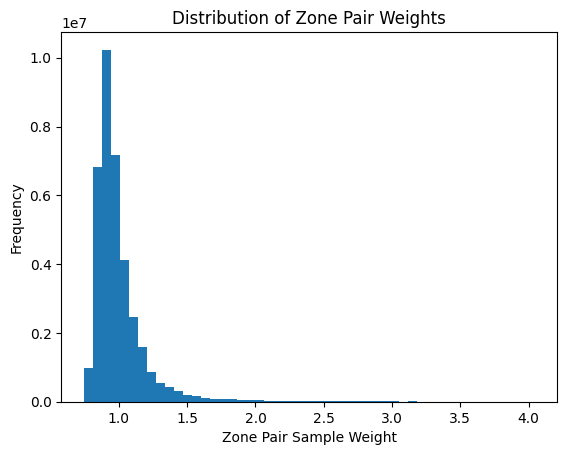

[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.469560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4208
[LightGBM] [Info] Number of data points in the train set: 29331556, number of used features: 7
[LightGBM] [Info] Start training from score 1.928237
Weighted Distance RMSE: 2.54 miles
No common zone pairs found in validation set.
No rare zone pairs found in validation set.


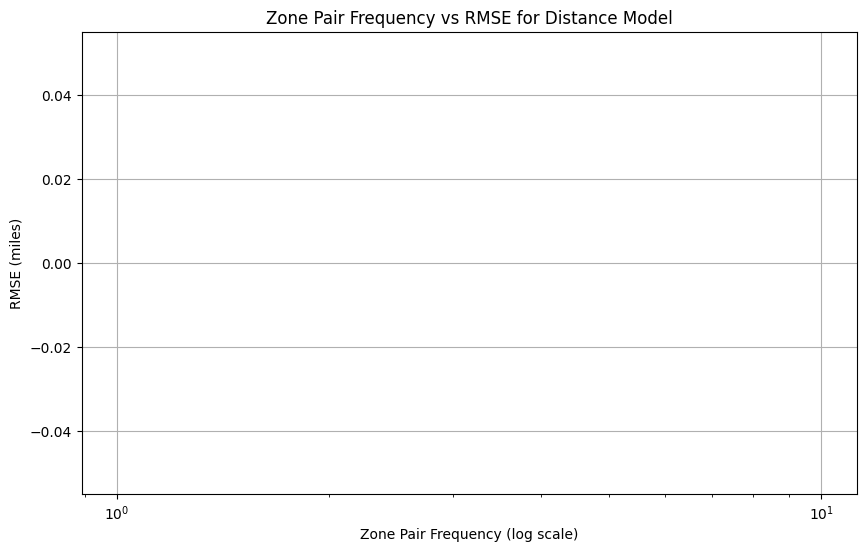

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.412572 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 987
[LightGBM] [Info] Number of data points in the train set: 29331556, number of used features: 8
[LightGBM] [Info] Start training from score 2.581450
Duration RMSE: 5.34 minutes
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.487686 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1242
[LightGBM] [Info] Number of data points in the train set: 29331556, number of used features: 9
[LightGBM] [Info] Start training from score 20.691751
Fare RMSE: 4.76 dollars


In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import joblib
import matplotlib.pyplot as plt

# ——— Prepare DataFrame ———

df = df_model_ready.copy()

# Encode categorical features
le_pu = LabelEncoder()
le_do = LabelEncoder()
le_rush = LabelEncoder()
le_pc = LabelEncoder()
le_hour = LabelEncoder()
le_dow = LabelEncoder()
le_zone_pair = LabelEncoder()
# make one list of all the columns to be encoded
# categorical_features = ['pickup_zone', 'dropoff_zone', 'is_rush_hour', 'passenger_count', 'hour_of_day', 'day_of_week']
df['pickup_zone_enc'] = le_pu.fit_transform(df['pickup_zone'])
df['dropoff_zone_enc'] = le_do.fit_transform(df['dropoff_zone'])
df['is_rush_hour_enc'] = le_rush.fit_transform(df['is_rush_hour'])
df['passenger_count_enc'] = le_pc.fit_transform(df['passenger_count'].astype(int))
df['hour_of_day_enc'] = le_hour.fit_transform(df['hour_of_day'].astype(int))
df['day_of_week_enc'] = le_dow.fit_transform(df['day_of_week'].astype(int))

# Create unordered zone_pair and encode it
df['zone_pair_str'] = (
    df[['pickup_zone_enc', 'dropoff_zone_enc']]
    .astype(str)
    .agg(lambda row: "_".join(sorted(row)), axis=1)
)
df['zone_pair_enc'] = le_zone_pair.fit_transform(df['zone_pair_str'])

# ——— Build distance bins & compute distance sample weights ———

bins = [0, 1, 3, 5, 10, 20, df['trip_distance'].max() + 1]
labels = list(range(len(bins) - 1))
df['dist_bin'] = pd.cut(
    df['trip_distance'], bins=bins, labels=labels, include_lowest=True
)

bin_frac = df['dist_bin'].value_counts(normalize=True).sort_index()
df['sample_weight_distance'] = df['dist_bin'].map(lambda b: 1.0 / bin_frac.loc[b])

# Normalize distance sample weights
sw = df['sample_weight_distance'].astype(float)
df['sample_weight_distance'] = sw * len(sw) / sw.sum()

# ——— Build zone-pair sample weights (improved)———

pair_counts = df['zone_pair_str'].value_counts()
df['pair_freq'] = df['zone_pair_str'].map(pair_counts)

# Use smoothed inverse frequency
df['sample_weight_zone_pair'] = 1.0 / np.log1p(df['pair_freq'] + 9)

# Normalize zone pair sample weights
zp = df['sample_weight_zone_pair'].astype(float)
df['sample_weight_zone_pair'] = zp * len(zp) / zp.sum()

# (Optional) Plot weight distribution to check
plt.hist(df['sample_weight_zone_pair'], bins=50)
plt.xlabel('Zone Pair Sample Weight')
plt.ylabel('Frequency')
plt.title('Distribution of Zone Pair Weights')
plt.show()

# ——— Combine both weights into final sample weight ———

df['final_sample_weight'] = df['sample_weight_distance'] * df['sample_weight_zone_pair']

# ——— Train Distance Model ———

base_features = [
    'pickup_zone_enc', 'dropoff_zone_enc', 'zone_pair_enc',
    'hour_of_day_enc', 'day_of_week_enc',
    'is_rush_hour_enc', 'passenger_count_enc'
]

X = df[base_features]
y = np.log1p(df['trip_distance'])
w = df['final_sample_weight']

X_tr, X_te, y_tr, y_te, w_tr, w_te = train_test_split(
    X, y, w, test_size=0.2, random_state=42
)

X_tr = X_tr._to_pandas(); X_te = X_te._to_pandas()
y_tr = y_tr._to_pandas(); y_te = y_te._to_pandas()
w_tr = w_tr._to_pandas(); w_te = w_te._to_pandas()

dist_model = lgb.LGBMRegressor(
    n_estimators=500, max_depth=8,
    learning_rate=0.05, num_leaves=64,
    subsample=0.8, colsample_bytree=0.8,
    random_state=42, n_jobs=-1
)
dist_model.fit(
    X_tr, y_tr,
    sample_weight=w_tr,
    categorical_feature=['zone_pair_enc']
)

# Evaluate Distance Model
y_pred_log = dist_model.predict(X_te)
y_pred_dist = np.expm1(y_pred_log)
y_true_dist = np.expm1(y_te)
rmse_dist = np.sqrt(
    mean_squared_error(y_true_dist, y_pred_dist, sample_weight=w_te)
)
print(f"Weighted Distance RMSE: {rmse_dist:.2f} miles")

df['predicted_distance'] = np.expm1(dist_model.predict(X))

# ——— Additional Evaluation: Common vs Rare Zone Pairs ———

X_te['zone_pair_str'] = (
    X_te[['pickup_zone_enc', 'dropoff_zone_enc']]
    .astype(str)
    .agg(lambda row: "_".join(sorted(row)), axis=1)
)

results = pd.DataFrame({
    'zone_pair_str': X_te['zone_pair_str'],
    'y_true': np.expm1(y_te),
    'y_pred': np.expm1(y_pred_log)
})

pair_counts_total = df['zone_pair_str'].value_counts()
results['pair_count'] = results['zone_pair_str'].map(pair_counts_total)

# Split results into common and rare
common_pairs = results[results['pair_count'] >= 100]
rare_pairs   = results[results['pair_count'] < 100]

# Only calculate RMSE if not empty
if not common_pairs.empty:
    rmse_common = np.sqrt(mean_squared_error(common_pairs['y_true'], common_pairs['y_pred']))
    print(f"Common Zone Pairs RMSE: {rmse_common:.2f} miles")
else:
    print("No common zone pairs found in validation set.")

if not rare_pairs.empty:
    rmse_rare = np.sqrt(mean_squared_error(rare_pairs['y_true'], rare_pairs['y_pred']))
    print(f"Rare Zone Pairs RMSE: {rmse_rare:.2f} miles")
else:
    print("No rare zone pairs found in validation set.")


# Plot RMSE vs Zone-Pair Frequency
grouped = results.groupby('zone_pair_str').agg({
    'y_true': list,
    'y_pred': list,
    'pair_count': 'first'
}).reset_index()

grouped['rmse'] = grouped.apply(lambda row: np.sqrt(mean_squared_error(row['y_true'], row['y_pred'])), axis=1)

plt.figure(figsize=(10,6))
plt.scatter(grouped['pair_count'], grouped['rmse'])
plt.xscale('log')
plt.xlabel('Zone Pair Frequency (log scale)')
plt.ylabel('RMSE (miles)')
plt.title('Zone Pair Frequency vs RMSE for Distance Model')
plt.grid(True)
plt.show()

# ——— Train Duration Model ———

duration_features = base_features + ['predicted_distance']
X_dur = df[duration_features]
y_dur = np.log1p(df['trip_duration'])

X_tr_u, X_te_u, y_tr_u, y_te_u = train_test_split(
    X_dur, y_dur, test_size=0.2, random_state=42
)
X_tr_u = X_tr_u._to_pandas(); X_te_u = X_te_u._to_pandas()
y_tr_u = y_tr_u._to_pandas(); y_te_u = y_te_u._to_pandas()

dur_model = lgb.LGBMRegressor(
    n_estimators=500, max_depth=8,
    learning_rate=0.05, num_leaves=64,
    subsample=0.8, colsample_bytree=0.8,
    random_state=42, n_jobs=-1
)
dur_model.fit(X_tr_u, y_tr_u)

y_pred_dur_log = dur_model.predict(X_te_u)
y_pred_dur = np.expm1(y_pred_dur_log)
y_true_dur = np.expm1(y_te_u)
rmse_dur = np.sqrt(mean_squared_error(y_true_dur, y_pred_dur))
print(f"Duration RMSE: {rmse_dur:.2f} minutes")

df['predicted_duration'] = np.expm1(dur_model.predict(X_dur))

# ——— Train Fare Model ———

fare_features = base_features + ['predicted_distance', 'predicted_duration']
X_fare = df[fare_features]
y_fare = df['total_amount']

X_tr_f, X_te_f, y_tr_f, y_te_f = train_test_split(
    X_fare, y_fare, test_size=0.2, random_state=42
)
X_tr_f = X_tr_f._to_pandas(); X_te_f = X_te_f._to_pandas()
y_tr_f = y_tr_f._to_pandas(); y_te_f = y_te_f._to_pandas()

fare_model = lgb.LGBMRegressor(
    n_estimators=500, max_depth=8,
    learning_rate=0.05, num_leaves=64,
    subsample=0.8, colsample_bytree=0.8,
    random_state=42, n_jobs=-1
)
fare_model.fit(X_tr_f, y_tr_f)

y_pred_fare = fare_model.predict(X_te_f)
rmse_fare = np.sqrt(mean_squared_error(y_te_f, y_pred_fare))
print(f"Fare RMSE: {rmse_fare:.2f} dollars")


In [45]:
# 6) Save models & encoders
joblib.dump(dist_model,     "trip_distance_model.pkl")
joblib.dump(dur_model,      "trip_duration_model.pkl")
joblib.dump(fare_model,     "trip_fare_model.pkl")
joblib.dump(le_pu,          "pickup_zone_encoder.pkl")
joblib.dump(le_do,          "dropoff_zone_encoder.pkl")
joblib.dump(le_zone_pair,   "zone_pair_encoder.pkl")

['zone_pair_encoder.pkl']

In [67]:
# how many unique 'zone_pair_enc' are there in the dataset?
print(len(df['zone_pair_enc'].unique()))


24485


In [65]:


# 2) Group & compute median:
median_table = (
    df.groupby('zone_pair_str')['trip_distance']
      .median()
      .reset_index(name='median_distance')
      .sort_values('median_distance')   # optional, to see shortest-to-longest
)

print(median_table)


      zone_pair_str  median_distance
21981        256_99             0.53
21567         250_6             0.60
808           103_2             0.60
12079        163_28             0.62
24451         90_90             0.62
...             ...              ...
21800        254_52            29.80
23028         41_96            29.81
20109        231_24            29.82
3958          11_29            29.90
2042          10_35            30.00

[24485 rows x 2 columns]


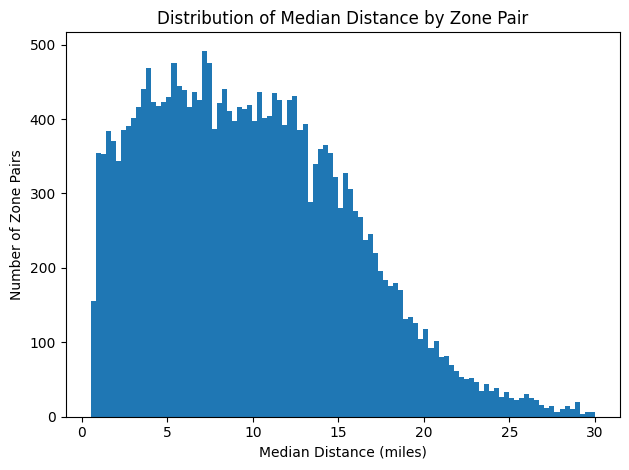

In [64]:
import matplotlib.pyplot as plt

# 1) Compute median distance per zone-pair
median_distances = df.groupby('zone_pair_str')['trip_distance'].median()

# 2) Plot a single histogram of those medians
plt.hist(median_distances, bins=100)
plt.title("Distribution of Median Distance by Zone Pair")
plt.xlabel("Median Distance (miles)")
plt.ylabel("Number of Zone Pairs")
plt.tight_layout()
plt.show()
